In [15]:
import tushare as ts
ts.set_token("493a07b6e83f937e4fe4f7ecec5d2a42115535be085a79db37fa3163")
pro=ts.pro_api()
data=pro.daily(ts_code="600036.SH",start_date="20150101",end_date="20200101")

In [16]:
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600036.SH,20191231,37.85,37.88,37.31,37.58,37.83,-0.25,-0.6609,376805.06,1412996.239
1,600036.SH,20191230,37.60,37.92,37.11,37.83,37.86,-0.03,-0.0792,444962.89,1670186.942
2,600036.SH,20191227,38.10,38.50,37.80,37.86,38.10,-0.24,-0.6299,359535.34,1370335.108
3,600036.SH,20191226,37.78,38.10,37.69,38.10,37.79,0.31,0.8203,192239.76,728012.313
4,600036.SH,20191225,38.01,38.23,37.62,37.79,38.01,-0.22,-0.5788,235027.61,889443.213
...,...,...,...,...,...,...,...,...,...,...,...
1209,600036.SH,20150109,15.56,16.56,15.36,15.71,15.57,0.14,0.9000,4613634.97,7356771.842
1210,600036.SH,20150108,16.25,16.34,15.53,15.57,16.16,-0.59,-3.6500,2929211.10,4621824.801
1211,600036.SH,20150107,16.20,16.56,15.94,16.16,16.42,-0.26,-1.5800,2961696.04,4806397.453
1212,600036.SH,20150106,16.40,17.20,16.29,16.42,16.68,-0.26,-1.5600,4268772.34,7100974.463


In [17]:
data=data.iloc[1:]
data=data.fillna(method="ffill")
data.head

<bound method NDFrame.head of         ts_code trade_date   open   high    low  close  pre_close  change  \
1     600036.SH   20191230  37.60  37.92  37.11  37.83      37.86   -0.03   
2     600036.SH   20191227  38.10  38.50  37.80  37.86      38.10   -0.24   
3     600036.SH   20191226  37.78  38.10  37.69  38.10      37.79    0.31   
4     600036.SH   20191225  38.01  38.23  37.62  37.79      38.01   -0.22   
5     600036.SH   20191224  37.45  38.15  37.45  38.01      37.40    0.61   
...         ...        ...    ...    ...    ...    ...        ...     ...   
1209  600036.SH   20150109  15.56  16.56  15.36  15.71      15.57    0.14   
1210  600036.SH   20150108  16.25  16.34  15.53  15.57      16.16   -0.59   
1211  600036.SH   20150107  16.20  16.56  15.94  16.16      16.42   -0.26   
1212  600036.SH   20150106  16.40  17.20  16.29  16.42      16.68   -0.26   
1213  600036.SH   20150105  16.56  17.07  16.25  16.68      16.59    0.09   

      pct_chg         vol       amount  
1   

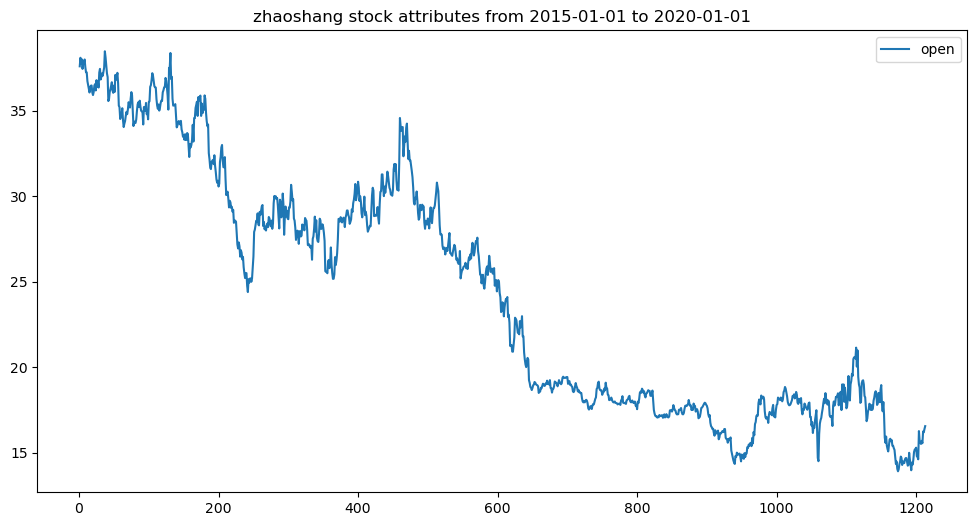

In [18]:
import matplotlib.pyplot as plt
data=data[["trade_date","open"]]
data.plot(subplots=True, figsize=(12, 6))
plt.title("zhaoshang stock attributes from 2015-01-01 to 2020-01-01")
plt.savefig("stock.png")
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller as ADF
diff=0
adf=ADF(data["open"])
if adf[1]>0.05:
    print(u"原始序列经检验不平稳，p值为：%s"%adf[1])
else:
    print(u"原始序列经检验平稳，p值为：%s"%adf[1])

原始序列经检验不平稳，p值为：0.47948330220890795


In [20]:
data.head()

,trade_date,open
1,20191230,37.60
2,20191227,38.10
3,20191226,37.78
4,20191225,38.01
5,20191224,37.45


In [21]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# 数据预处理，插值
data['trade_date'] = pd.to_datetime(data['trade_date'])
data.set_index('trade_date', inplace=True)
data = data.resample('D').interpolate(method='linear')
data.head()

,open
trade_date,
2015-01-05,16.56
2015-01-06,16.40
2015-01-07,16.20
2015-01-08,16.25
2015-01-09,15.56


### 画出ACF、PACF图

定义绘图函数

In [22]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 定义绘图函数，画出原信号、ACF、PACF图
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
        xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # 指定轴
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # 绘制图像
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series Analysis Plots')
    plot_acf(xt, lags=nlag, ax=ax_acf)
    plot_pacf(xt, lags=nlag, ax=ax_pacf)
    plt.tight_layout()
    plt.show()
    return None

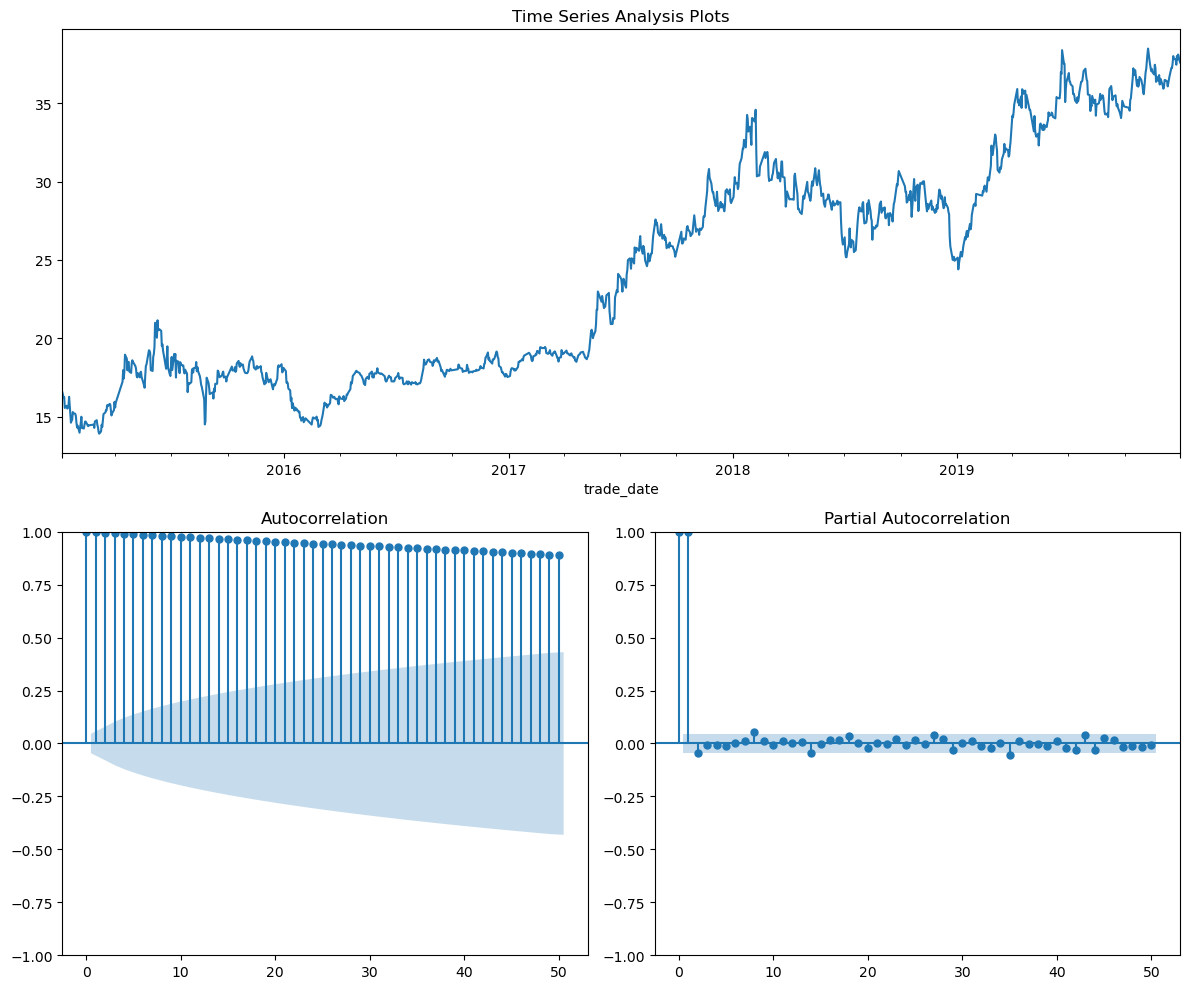

In [23]:
# 画出三图
plotds(data.open, nlag=50)

### 定阶选取ARIMA的p、q、d参数

In [24]:
import statsmodels.tsa.api as smtsa

# d = 1
aicVal=[]
for p in range(0, 6):
    for q in range(0, 6):
        try:
            model_d1 = smtsa.ARIMA(data.open, order=(p, 1, q)).fit(method='innovations_mle')
            aicVal.append([p, q, model_d1.aic])
        except Exception as e:
            print(e)
            
print(aicVal)
min_aic = min(aicVal, key=lambda x: x[2])
best_p = min_aic[0]
best_q = min_aic[1]

print('Best p: ', best_p)
print('Best q: ', best_q)

[[0, 0, 1167.8109958699304], [0, 1, 1163.5625109003424], [0, 2, 1165.425916900672], [0, 3, 1167.389446679086], [0, 4, 1169.070478743268], [0, 5, 1169.9886465492955], [1, 0, 1163.6966258650693], [1, 1, 1165.4509637981214], [1, 2, 1164.120694634838], [1, 3, 1166.9985898229127], [1, 4, 1166.8434426901745], [1, 5, 1166.6820853772244], [2, 0, 1165.407594928853], [2, 1, 1167.4058906724217], [2, 2, 1153.6904374495025], [2, 3, 1155.606709486315], [2, 4, 1155.376667832646], [2, 5, 1165.3444061444814], [3, 0, 1167.4033368018768], [3, 1, 1167.6413775461035], [3, 2, 1155.6023868941788], [3, 3, 1155.56726448416], [3, 4, 1163.0506842079851], [3, 5, 1154.9412095659757], [4, 0, 1169.208229728232], [4, 1, 1168.3413656665155], [4, 2, 1155.4353804553557], [4, 3, 1162.7923839337668], [4, 4, 1150.7038217633672], [4, 5, 1152.2633699910266], [5, 0, 1170.550969637327], [5, 1, 1168.7521978262578], [5, 2, 1166.7652091288744], [5, 3, 1154.7634146508633], [5, 4, 1153.523524949077], [5, 5, 1155.9756419066866]]
Bes

### d=1的时候进行拟合

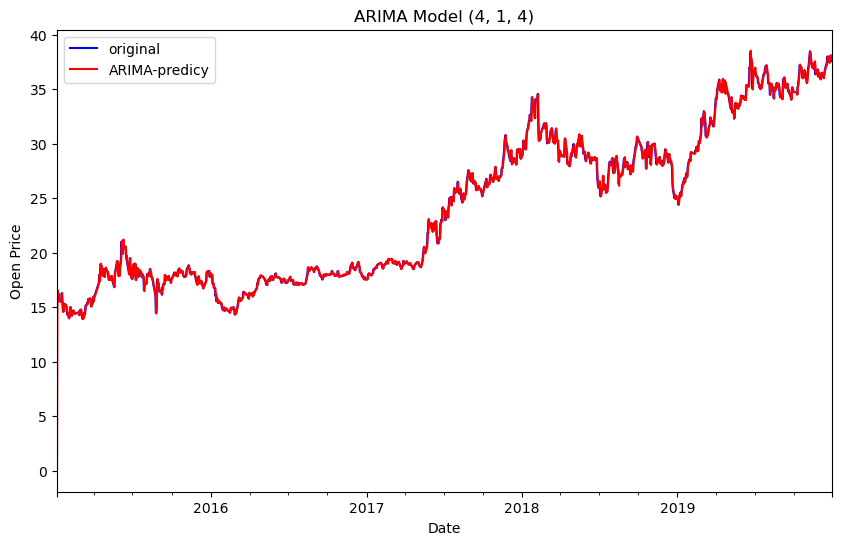

In [25]:
model = smtsa.ARIMA(data.open, order=(best_p, 1, best_q))
model_fit = model.fit()
data['ARIMA'] = model_fit.predict(typ='levels', dynamic=False)

fig, ax = plt.subplots(1, sharex=True)
fig.set_size_inches(10, 6)

data.open.plot(ax=ax, label='original', color='b')
data.ARIMA.plot(ax=ax, label='ARIMA-predicy', color='r')
ax.set_title('ARIMA Model (%s, 1, %s)' % (best_p, best_q))

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

可以发现，d = 1 的时候拟合效果非常好

### d = 2 的时候进行拟合

In [26]:
import statsmodels.tsa.api as smtsa

# d = 2
aicVal=[]
for p in range(0, 6):
    for q in range(0, 6):
        try:
            model_d2 = smtsa.ARIMA(data.open, order=(p, 2, q)).fit(method='innovations_mle')
            aicVal.append([p, q, model_d2.aic])
        except Exception as e:
            print(e)
            
print(aicVal)
min_aic = min(aicVal, key=lambda x: x[2])
best_p = min_aic[0]
best_q = min_aic[1]

print('Best p: ', best_p)
print('Best q: ', best_q)

[[0, 0, 2320.216979571891], [0, 1, 1175.4874700692067], [0, 2, 1171.3784411203656], [0, 3, 1173.2287243167743], [0, 4, 1175.1789722645117], [0, 5, 1176.9016371358953], [1, 0, 1880.484984810249], [1, 1, 1171.503337488294], [1, 2, 1177.2698698299923], [1, 3, 1174.5723850679624], [1, 4, 1174.7497171997218], [1, 5, 1174.664948870739], [2, 0, 1680.0312528790148], [2, 1, 1173.1897809793347], [2, 2, 1175.0121640017219], [2, 3, 1161.4352680291984], [2, 4, 1174.4674733196846], [2, 5, 1163.186698841384], [3, 0, 1560.573595268164], [3, 1, 1175.1767136145604], [3, 2, 1176.4048269668278], [3, 3, 1163.3626192072577], [3, 4, 1174.5187065791417], [3, 5, 1167.327495650131], [4, 0, 1503.4163723972933], [4, 1, 1177.0178410497297], [4, 2, 1178.327531191529], [4, 3, 1163.2455711055275], [4, 4, 1173.6896112772981], [4, 5, 1161.540014755095], [5, 0, 1443.7345609866877], [5, 1, 1178.3169375982468], [5, 2, 1179.9432792228251], [5, 3, 1167.7365748084799], [5, 4, 1167.1238568885303], [5, 5, 1168.4757690257309]]


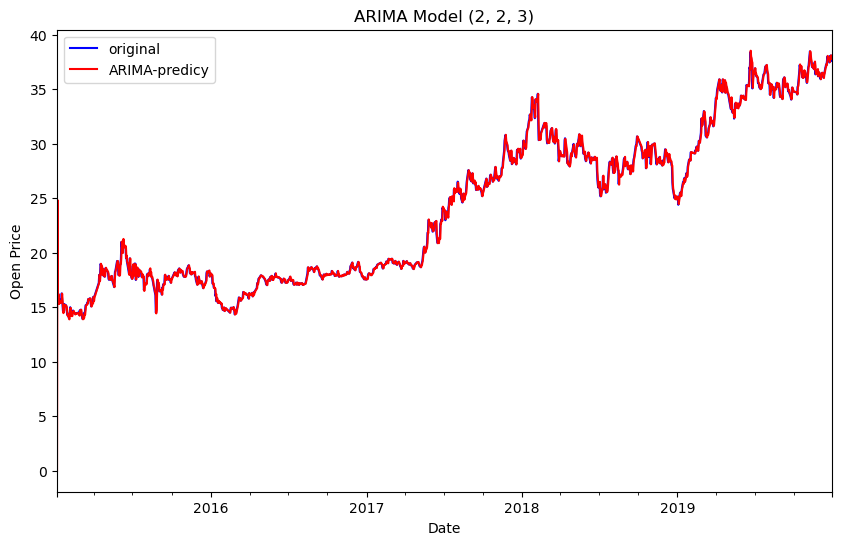

In [28]:
model = smtsa.ARIMA(data.open, order=(best_p, 2, best_q))
model_fit = model.fit()
data['ARIMA'] = model_fit.predict(typ='levels', dynamic=False)

fig, ax = plt.subplots(1, sharex=True)
fig.set_size_inches(10, 6)

data.open.plot(ax=ax, label='original', color='b')
data.ARIMA.plot(ax=ax, label='ARIMA-predicy', color='r')
ax.set_title('ARIMA Model (%s, 2, %s)' % (best_p, best_q))

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

可以发现，d = 2 的时候拟合效果也非常好

### 使用其他模型进行比较

若使用AR模型

In [29]:
from statsmodels.tsa.ar_model import AutoReg as AR

aicVal = []
for ari in range(0, 10):
    try:
        model = AR(data.open, lags=ari).fit()
        aicVal.append([ari, model.aic])
    except Exception as e:
        print(e)
        
print(aicVal)
min_aic = min(aicVal, key=lambda x: x[1])
best_ari = min_aic[0]

print('Best AR order (ari):', best_ari)

[[0, 12305.834344745761], [1, 1169.467193279198], [2, 1165.5939439808649], [3, 1167.2529864839455], [4, 1169.5897537404876], [5, 1167.2007771666738], [6, 1168.8134080441573], [7, 1170.6324136619003], [8, 1147.2555197037505], [9, 1147.8313647571206]]
Best AR order (ari): 8


In [30]:
model = AR(data.open.tolist(), lags=8)
model_fit = model.fit()

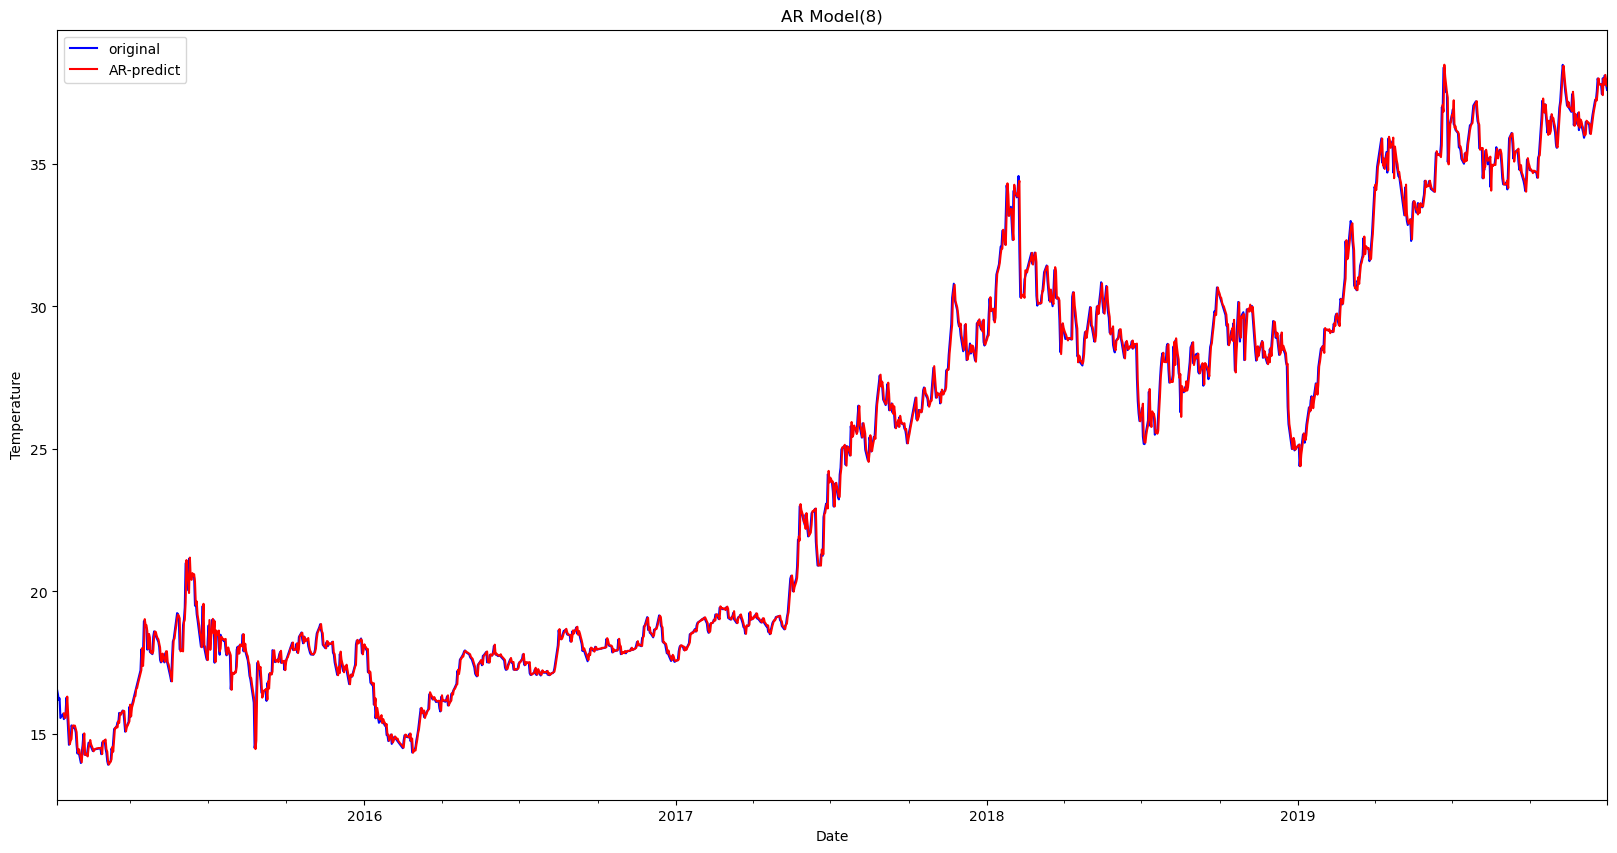

In [32]:
data['AR'] = model_fit.predict()
fig,ax = plt.subplots(1, sharex=True)
fig.set_size_inches(20, 10)

# 画出真实数据
data.open.plot(ax=ax, color='b', label='original')
# 画出预测数据
data.AR.plot(ax=ax, color='r', label='AR-predict')
ax.set_title('AR Model(%s)' % best_ari)

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

可以看出，AR模型的拟合性能也不错